In [1]:
import numpy as np
import time
from ds1054z import DS1054Z
%matplotlib inline
import matplotlib.pyplot as plt

scope = DS1054Z('192.168.1.252')
print(scope.idn)

RIGOL TECHNOLOGIES,DS1054Z,DS1ZA192409533,00.04.04.SP3


In [2]:
scope.single()
time.sleep(1)
V = scope.get_waveform_samples(1)
Ts = scope.waveform_time_values

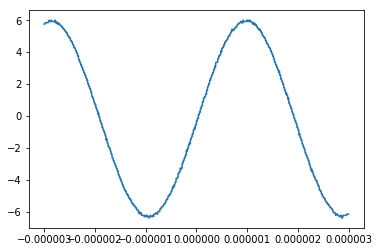

In [3]:
plt.figure(0)
plt.plot(Ts,V) 
plt.show()

In [4]:
scale = scope.timebase_scale
scope.timebase_scale = scale*100
if(not scope.running):
    scope.run()
time.sleep(1)
scope.memory_depth = 120e3
time.sleep(1)
scope.single()
time.sleep(1)
V2 = scope.get_waveform_samples(1,mode='MAX')
Ts2 = scope.waveform_time_values
scope.timebase_scale = scale
scope.single()

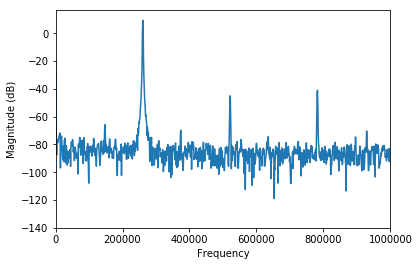

In [5]:
plt.figure(1)
plt.magnitude_spectrum(V2,Fs=1/(Ts2[1]-Ts2[0]),scale='dB')
plt.xlim(0,1e6)
plt.show()